# 1 - Introduction

### Name : Hedy Fernando
### Batch : 001-HCK
### Data-Set : Telco Customer Churn
### Objective : Make a model to predict customers  who will be churn or not churn.

# 2 - Import Libraries

In [504]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from imblearn.over_sampling import SMOTENC
from collections import Counter


import pickle

# Setting Seed
np.random.seed(24)
tf.random.set_seed(24)

# ignore warningsetting 
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [467]:
# Read Data-Set
data = pd.read_csv('Telco-Customer-Churn.csv')

# Convert columns name to lower font
data.columns = map(str.lower, data.columns)

# Set maximal columns
pd.set_option('display.max_columns', None)

In [468]:
# Show Top Data-Set
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [469]:
# Show Bottom Data-Set
data.tail()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [470]:
# Show Info Data-Set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


- Standard Analyse confirm that nothing null values in Data-Set. 
- Data-Set have 20 columns with 7043 entrie values.
- There 3 Data Types on Data-Set like int64, float64 and object.

In [471]:
# Change Dtype of totalcharges
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors = 'coerce')

# Change Dtype of seniorcitizen
data['seniorcitizen'] = data['seniorcitizen'].astype(object)

- Convert totalcharges from object to float, because values is numeric.
- Convert seniorcitizen from float to object, because values just has 2 types value.

In [7]:
# Check Dtype
print('totalcharges:',data.totalcharges.dtype)
print('seniorcitizen:',data.seniorcitizen.dtype)

totalcharges: float64
seniorcitizen: object


In [8]:
# Show Describe Data-Set
data.describe()

,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


From Describe just numeric columns will be shown, we have 3 numeric columns. Nothing anomalies in our numeric Data-Set and Senior Citizen values just has 2 unique values.

In [9]:
# Copy Data-Set to new variable
df = data.copy()

# Drop CustomerID in variable df
df.drop('customerid', axis=1, inplace=True)

We will copy data-set to new variable and we droped customerID column in new variable. We drop the column because the column will not be affect to target.

In [10]:
# Check Unique Values in Data-Set
for col in df.columns:
    print(col + ' unique :', df[col].nunique())
    print('='*30)

gender unique : 2
seniorcitizen unique : 2
partner unique : 2
dependents unique : 2
tenure unique : 73
phoneservice unique : 2
multiplelines unique : 3
internetservice unique : 3
onlinesecurity unique : 3
onlinebackup unique : 3
deviceprotection unique : 3
techsupport unique : 3
streamingtv unique : 3
streamingmovies unique : 3
contract unique : 3
paperlessbilling unique : 2
paymentmethod unique : 4
monthlycharges unique : 1585
totalcharges unique : 6530
churn unique : 2


- Numeric Columns : tenure, MonthlyCharges, TotalCharges.
- Except 3 columns above is category columns.

# 4 - Exploratory Data Analysis (EDA)

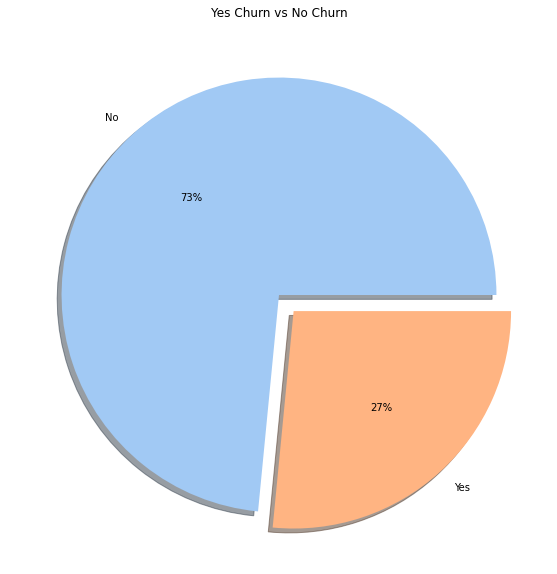

In [11]:
# Create pie chart

plt.figure(figsize=(10,10))
plt.title('Yes Churn vs No Churn')

colors = sns.color_palette('pastel')
labels = df['churn'].unique()
explode = (0, 0.1)

plt.pie(df['churn'].value_counts(),colors=colors,labels=labels, explode=explode, 
        autopct='%.0f%%', shadow=True)
plt.show()

Knowns that Target is imbalance, 'No' has 73% percentage and 'yes' just has 27% percentage.
It means that 'No' values more than 'yes' values.

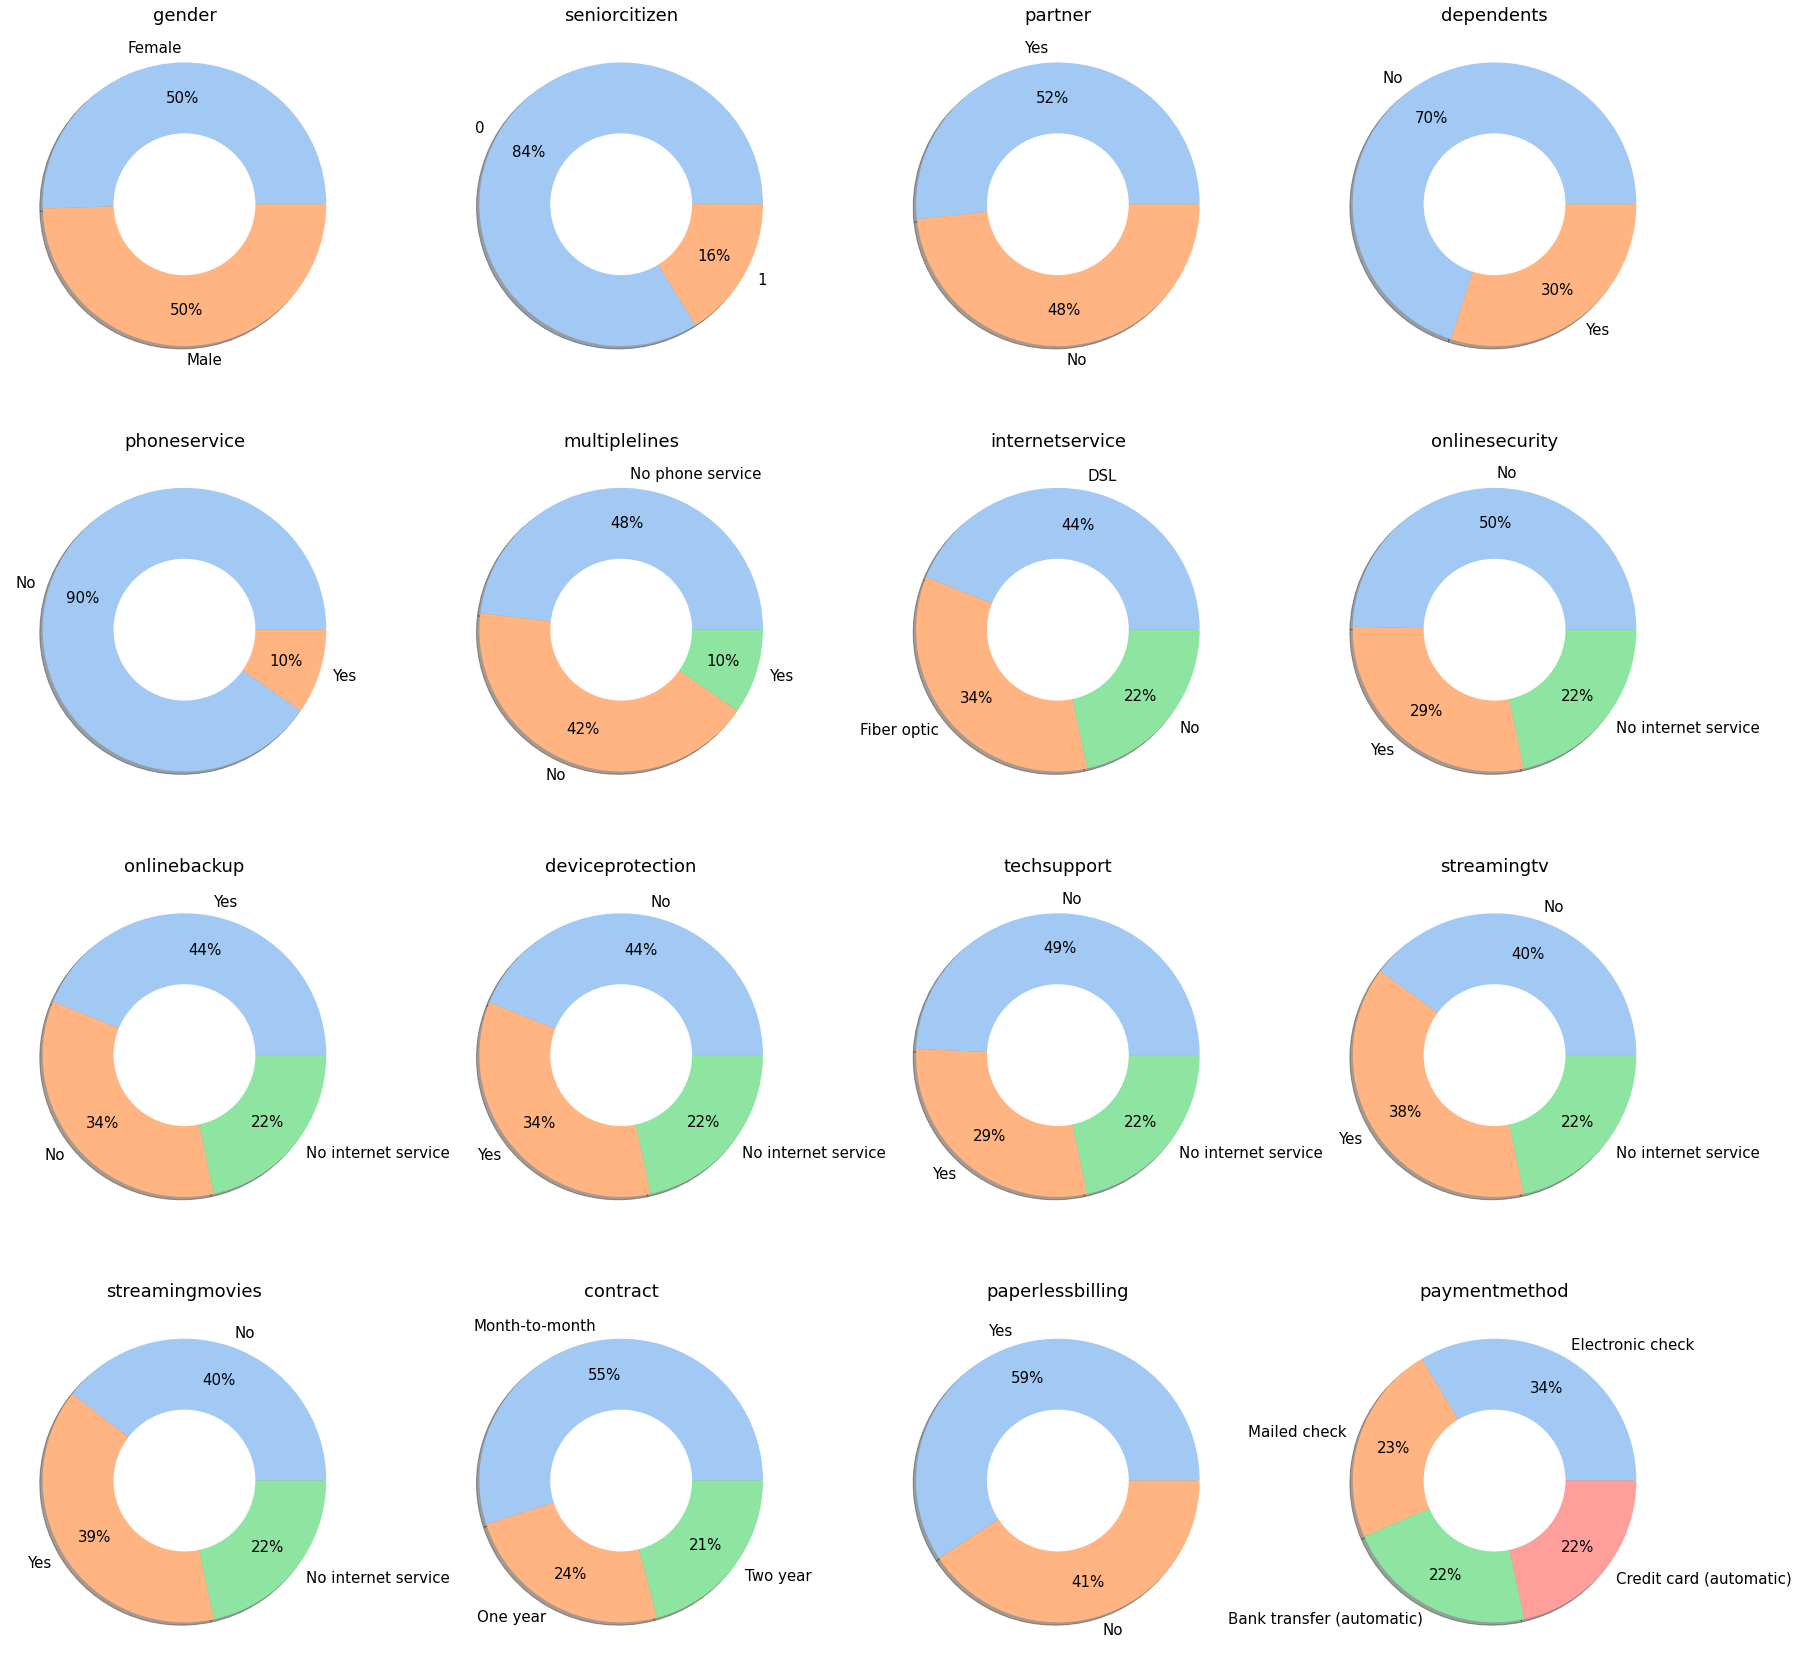

In [12]:
# Create donut chart

plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 15})
for col in range(len(df.select_dtypes(include='object').columns[:-1])):
    plt.subplot(4,4,col+1)
    
    plt.title(df.select_dtypes(include='object').columns[col])
    labels = df[df.select_dtypes(include='object').columns[col]].unique()
    colors = sns.color_palette('pastel')
    
    plt.pie(df[df.select_dtypes(include='object').columns[col]].value_counts(), labels=labels,
        autopct='%.0f%%', pctdistance=0.75, shadow=True, colors=colors)

    # draw circle
    centre = plt.Circle((0, 0), 0.50, fc='white')
    fig = plt.gcf()

    # Adding circle in pie chart
    fig.gca().add_artist(centre)

- Between male and female customers have the same number.
- The number of Senior Citizen customers is less than those who are not Senior Citizen, which is only 16%.
- Customers who are partners or not only differ 2% higher partners.
- No more dependents than yes dependents.
- More customers do not use phone service, only 10% of customers use phone service.
- Only 10% of customers use multiple lines.
- There are more DSL users on internet service than fiber, and only 22% do not use internet service.
- On average, the customers we have do not use online security services, only 29% of customers use this service and another 22% do not have internet service.
- Many of our customers use online backup of 44%.
- Only 34% of customers use device protection services.
- Only 29% of customers need techsupport.
- Streaming Tv is quite in demand, which is around 39% and those who use streaming TV also use streaming movies.
- Customers who have more customers with month-to-month contracts, where on average they are customers for home installation.
- 18% more people use electronic billing services compared to conventional ones.
- There are various payment methods used by customers, but most of them are using electronic checks.

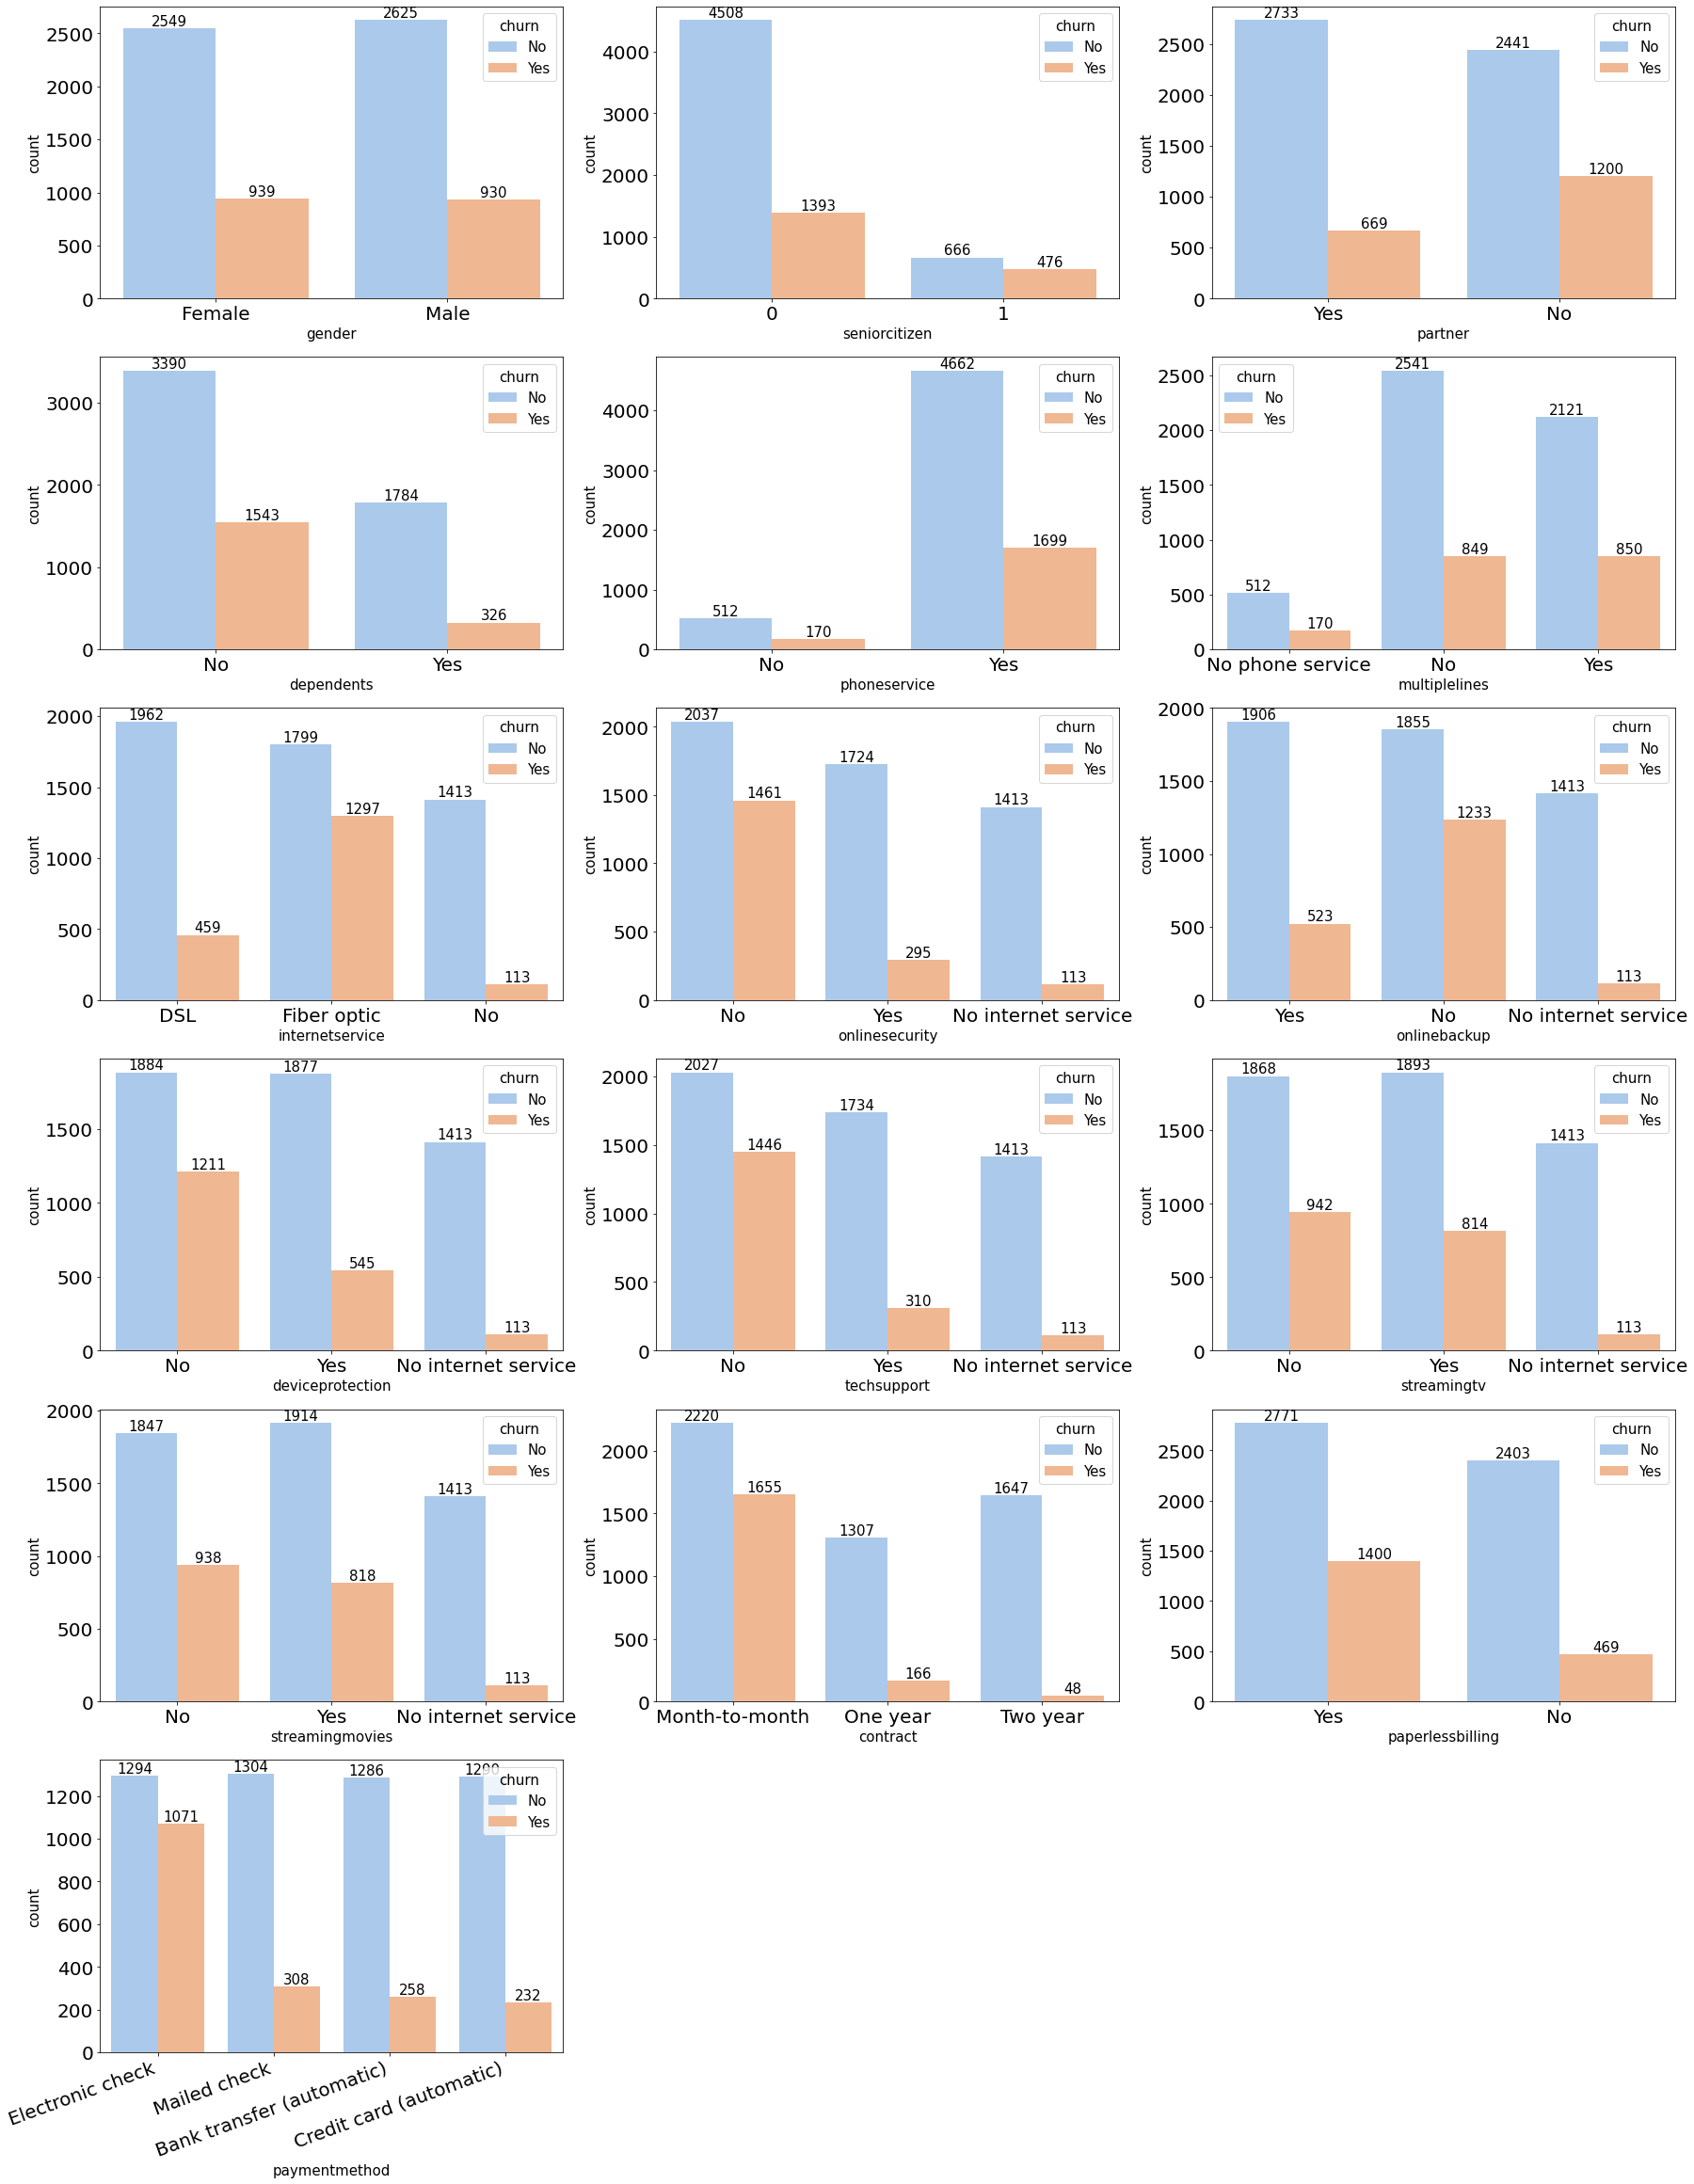

In [13]:
# Create countplot

plt.figure(figsize=(30,40))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 15})
for col in range(len(df.select_dtypes(include='object').columns[:-1])):
    plt.subplot(6,3,col+1)
    ax = sns.countplot(data=df, x=df[df.select_dtypes(include='object').columns[col]], hue='churn', palette='pastel')
    for i in ax.containers:
        ax.bar_label(i,)
plt.xticks(rotation=20, ha='right');

- Women churn slightly more than men.
- From the percentage of both senior citizens and non-senior citizens, it is known that more senior citizens churn than non-senior citizens.
- Those who are not partners are more churn than partners.
- No dependents churn more than the dependents.
- Those who use phone service are more likely to churn.

In [14]:
# Slicing tenure in range
tenure_slice = df.copy()
tenure_slice['tenure_range'] = pd.cut(tenure_slice['tenure'], [1,5,10,15,20,25,30,35,40,45,50,55,60,65,72])

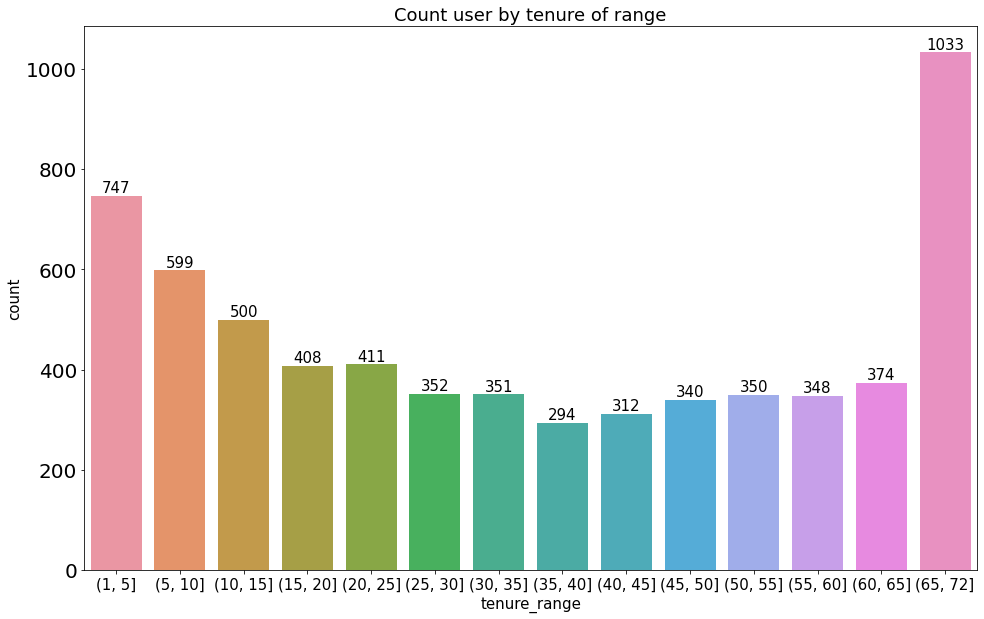

In [15]:
# Create Countplot of tenure_range
plt.figure(figsize=(16,10))
plt.rc('xtick', labelsize=15) 
plt.title('Count user by tenure of range')
ax=sns.countplot(data=tenure_slice, x='tenure_range')
for i in ax.containers:
    ax.bar_label(i,)

There are more users with tenure of 65 to 72 months than customers with tenure of 35 to 40 months. Many of our customers have subscribed for an annual period.

In [16]:
# Create a function
def connection(x,y):
    # set plot style: grey grid in the background:
    sns.set(style="darkgrid")

    # Set the figure size
    plt.figure(figsize=(10, 3))
    plt.title('Connection')

    # plot a bar chart
    sns.barplot(x=x, y=y, data=tenure_slice, ci=None, palette='pastel');

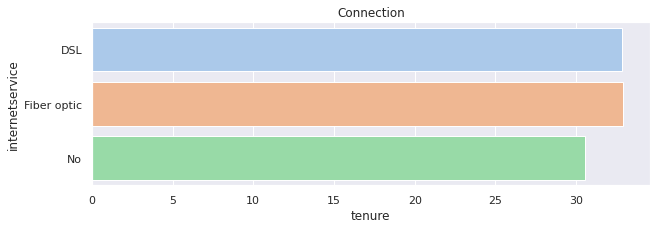

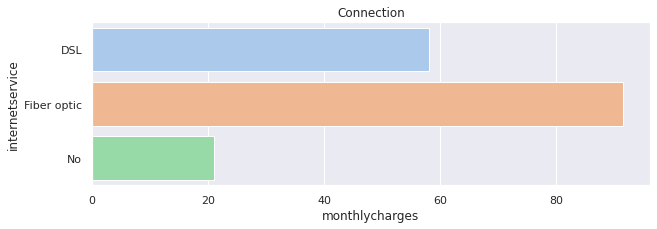

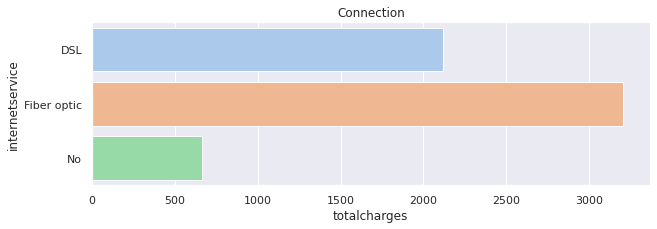

In [17]:
# Show Result of fungsion
connection('tenure', 'internetservice')
connection('monthlycharges', 'internetservice')
connection('totalcharges', 'internetservice')

- Internet service users who use DSL or Fiber optic have a longer tenure than those who do not use internet service.
- Fiber optic internet service users have a monthly fee that is more expensive than DSL, an average of more than 60 dollars.
- If you look at the total cost of fiber optic users, on average, they spend more than 3000 dollars.

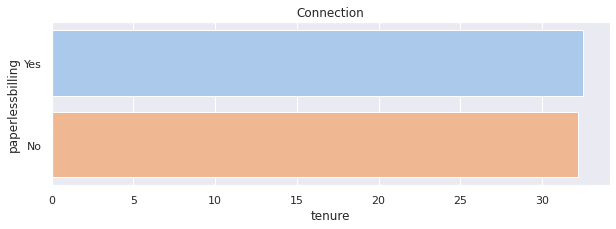

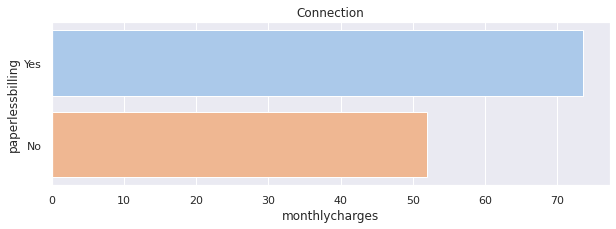

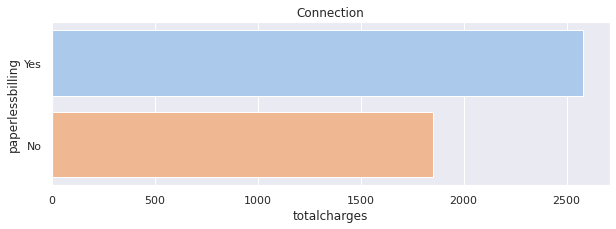

In [18]:
# Show Result of fungsion
connection('tenure', 'paperlessbilling')
connection('monthlycharges', 'paperlessbilling')
connection('totalcharges', 'paperlessbilling')

- Users with electronic bills and do not have almost the same number of tenures, which is above 30 months on average.
- Users with electronic bills on average pay more than customers who do not use electronic bills.
- The total cost spent by users with electronic bills is more than those without which is more than 2500 dollars. This indicates that users who are already dependent on technology will tend to be more No Churn.

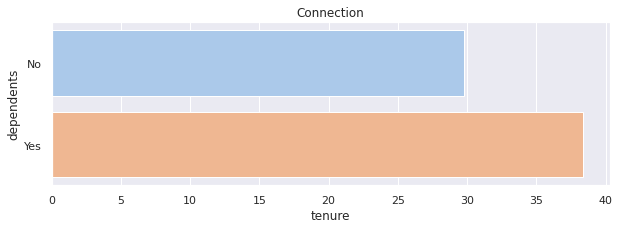

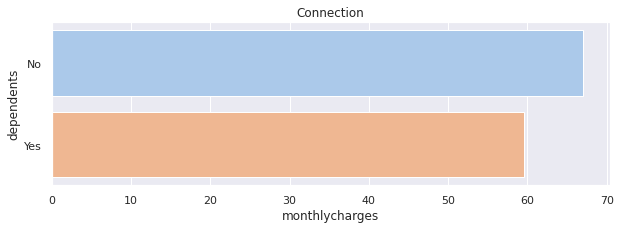

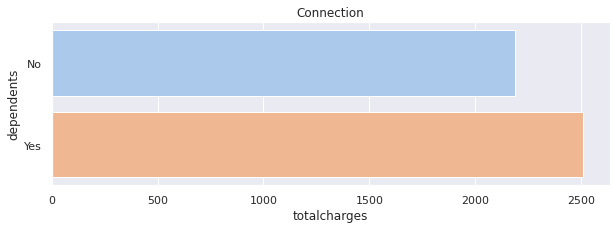

In [19]:
# Show Result of fungsion
connection('tenure', 'dependents')
connection('monthlycharges', 'dependents')
connection('totalcharges', 'dependents')

If seen from the graph above, it is known that dependent customers are more likely to have a longer tenure than those who do not and they are more likely to subscribe for an annual period.

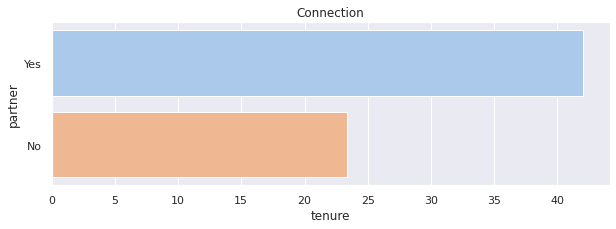

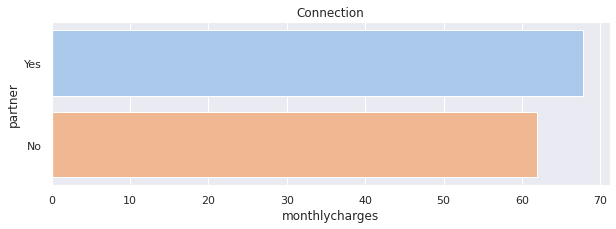

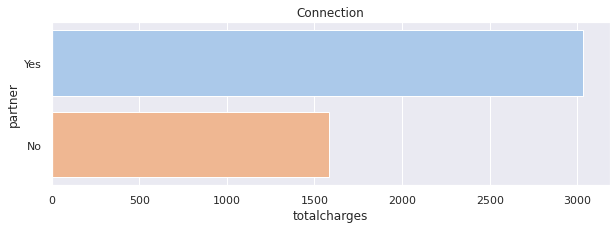

In [20]:
# Show Result of fungsion
connection('tenure', 'partner')
connection('monthlycharges', 'partner')
connection('totalcharges', 'partner')

Partners are more likely to subscribe on an annual basis and have more total payouts. This indicates that partners usually subscribe to packages and use all the services we have.

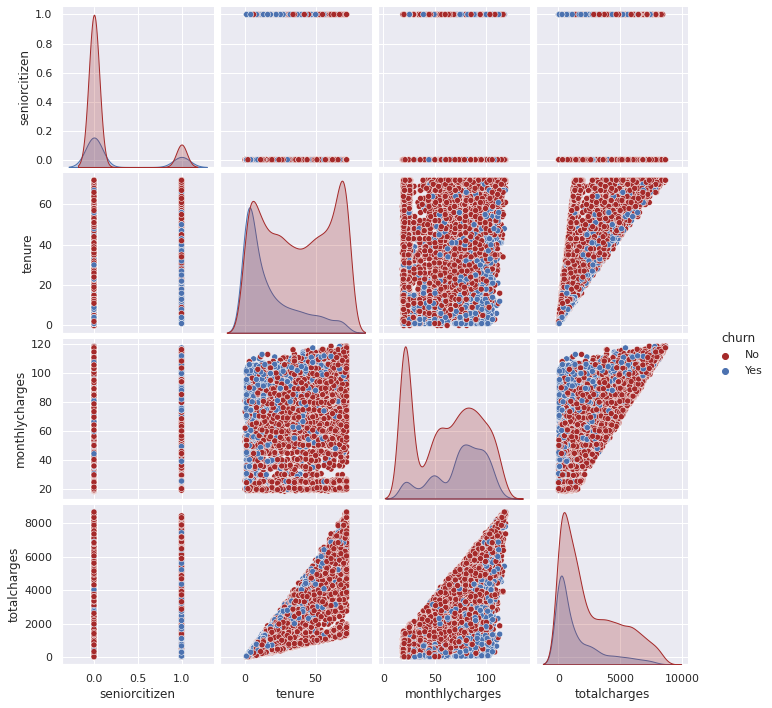

In [21]:
# Create pairplot

sns.pairplot(data=df, hue='churn', palette=('brown','b'))

We can see that customers with short tenure are more likely to churn.

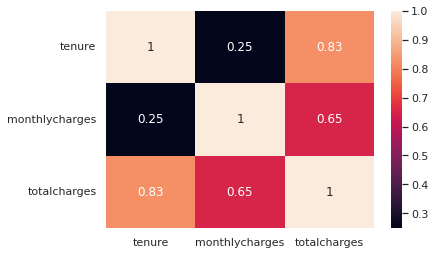

In [22]:
# Check heatmap correlations

sns.heatmap(df.corr(), annot=True);

monthly charges and tenure have high correlation to total charges, where the score is more than 0.5.

# 5 - Data Preprocessing

### Split Inference - Set

In [23]:
# Get data-Inference
df_inf = df.sample(5, random_state=15)

In [24]:
# Remove Inference-Set from data-set

df_tr_ts = df.drop(df_inf.index)

In [25]:
# Reset Index Data Inference and Data-Set

df_tr_ts.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)


### Split Feature and Target

In [26]:
# Split Features and Target

X = df.drop('churn', axis=1)
y = df['churn']

### Split Train, Test and Val

In [473]:
# Split train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, shuffle=True, test_size=0.2,
                                                  stratify=y)

#Split train and val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, shuffle=True,
                                                 test_size=0.2)

In [474]:
# Reset Index train, test, val
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [475]:
# Check Size
print('Train Size:', X_train.shape)
print('Test Size:', X_test.shape)
print('Val Size:', X_val.shape)

Train Size: (4507, 19)
Test Size: (1409, 19)
Val Size: (1127, 19)


In [476]:
# Check target values
y_train.value_counts()

No     3304
Yes    1203
Name: churn, dtype: int64

### Handling Outliers

tenureskew = 0.21084997995828933
monthlychargesskew = -0.23859780066832897
totalchargesskew = 0.9258539131734308


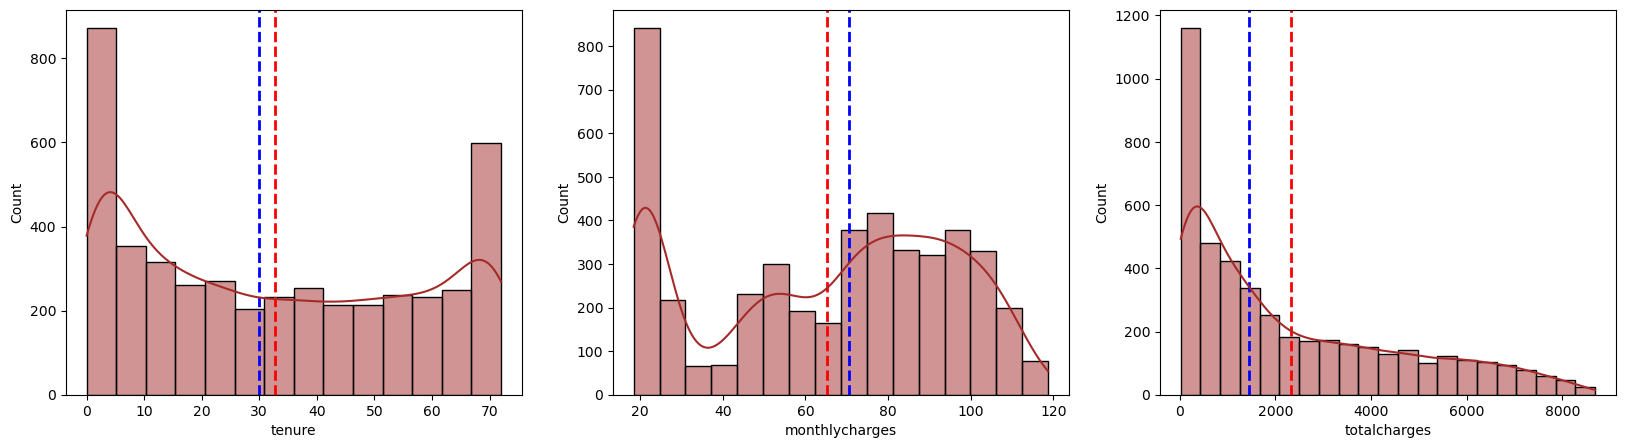

In [478]:
# Create hisplot for check data distribution in train-set

plt.figure(figsize=(20,5))
for col in range(len(X_train.select_dtypes(include=['float','int']).columns)):
    plt.subplot(1,3,col+1)
    plt.axvline(X_train[X_train.select_dtypes(include=['float','int']).columns[col]].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(X_train[X_train.select_dtypes(include=['float','int']).columns[col]].median(), color='blue', linestyle='dashed', linewidth=2)
    sns.histplot(X_train[X_train.select_dtypes(include=['float','int']).columns[col]], kde=True, color='brown')
    print(X_train.select_dtypes(include=['float','int']).columns[col]+'skew =', X_train[X_train.select_dtypes(include=['float','int']).columns[col]].skew())

- The average data is normally distributed.
- only skewed partner data.
- because more are normally distributed, it will be handled with Z-Score

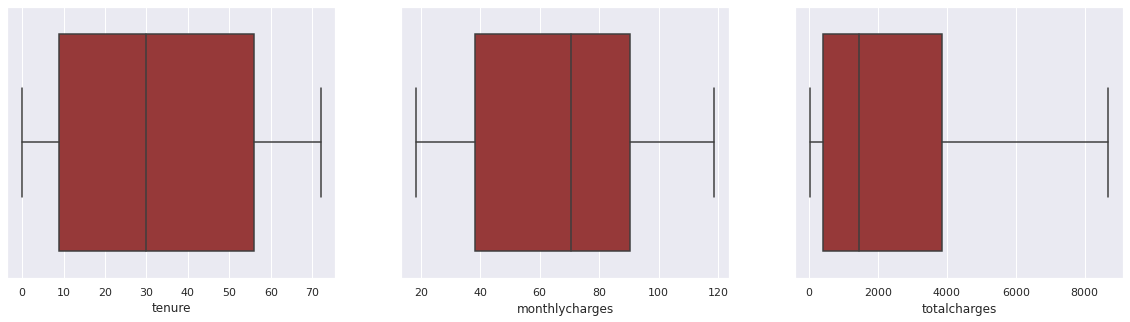

In [32]:
# Create Boxplot for check outliers in train-set

plt.figure(figsize=(20,5))
for col in range(len(X_train.select_dtypes(include=['float','int']).columns)):
    plt.subplot(1,3,col+1)
    sns.boxplot(X_train[X_train.select_dtypes(include=['float','int']).columns[col]], color='brown')

Nothing Outliers in our numerics data.

In [33]:
# Handling Outliers use Z-Score

outliers1 = []
outliers2 = []
for col in X_train.select_dtypes(include=['float','int']):
    
    # Search for upper and lower bound
    upr_limit = X_train[col].mean() + 3*X_train[col].std()
    lwr_limit = X_train[col].mean() -3*X_train[col].std()
    
    # Count upper and lower outliers
    outliers_upr = X_train[X_train[col] > upr_limit]
    outliers_lwr = X_train[X_train[col] < lwr_limit]
    
    outliers1.append(outliers_upr)
    outliers2.append(outliers_lwr)
    
    print(col+' upper Limit:', upr_limit)
    print(col+' Lower Limit:', lwr_limit)
    print(col+' Outliers upper:', len(outliers_upr))
    print(col+' Outliers lower:', len(outliers_lwr))
    print('='*50)

tenure upper Limit: 106.14689133304572
tenure Lower Limit: -40.71622792057624
tenure Outliers upper: 0
tenure Outliers lower: 0
monthlycharges upper Limit: 155.7770315813505
monthlycharges Lower Limit: -25.303900895750715
monthlycharges Outliers upper: 0
monthlycharges Outliers lower: 0
totalcharges upper Limit: 9146.447372473815
totalcharges Lower Limit: -4493.916128029361
totalcharges Outliers upper: 0
totalcharges Outliers lower: 0


Use Z-Score for to know upper and lower limit from each numerics data.

### Handling Missing Values

In [34]:
# Check missing values in X_train
X_train.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        7
dtype: int64

There 7 missing values in total charges.

In [35]:
# Check missing values in X_test
X_test.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        3
dtype: int64

There 3 missing values in total charges.

In [36]:
# Check missing values in X_val
X_val.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        1
dtype: int64

There 1 missing values in total charges. 
- before changing the data type there are no missing values in total charges. After changing there are missing values, there is an indication that the data contains text in total charges.

In [37]:
# Check missing values in y_train
y_train.isnull().sum()

0

In [38]:
# Check missing values in y_test
y_test.isnull().sum()

0

In [39]:
# Check missing values in y_val
y_val.isnull().sum()

0

Nothing missing values in our target.

In [40]:
# Drop missing values in Features(X)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
X_val.dropna(inplace=True)

# Index missing values
y_train_not = y_train.drop(X_train.index)
y_test_not = y_test.drop(X_test.index)
y_val_not = y_val.drop(X_val.index)

# Drop Missing values in Target
y_train = y_train.drop(y_train_not.index)
y_test = y_test.drop(y_test_not.index)
y_val = y_val.drop(y_val_not.index)

In [41]:
# Reset Index after drop missing values
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)

# Reset Index in Target
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

we do drop on the missing values ​​because there are only a few.

### Feature Selection

In [42]:
# Split between numeric and category

num_dat = list(X_train.select_dtypes(include=['float','int']).columns)
cat_dat = list(X_train.select_dtypes(include='object').drop('seniorcitizen', axis=1).columns)
st = X_train['seniorcitizen']

In [43]:
# Inisialize numeric and category to data-set variable

# train data-set
X_tr_num = X_train[num_dat]
X_tr_cat = X_train[cat_dat]

# test data-set
X_ts_num = X_test[num_dat]
X_ts_cat = X_test[cat_dat]

# val data-set
X_val_num = X_val[num_dat]
X_val_cat = X_val[cat_dat]

In [44]:
# Encode Category for feature selection with Kbest

encoder = OrdinalEncoder()
encoder.fit(X_tr_cat)

X_cat_fs = encoder.transform(X_tr_cat)

# Create DataFrame
X_cat_fs_df = pd.DataFrame(X_cat_fs)

# Change columns name
X_cat_fs_df.columns = X_tr_cat.columns

# Concat between columns category
cat_fs = pd.concat([X_cat_fs_df, st], axis=1)

encoding for feature selection using kbest, which must be numeric data.

#### Kbest with Anova Score

In [45]:
# Kbest with Anova Score

f_test = SelectKBest(score_func=f_classif, k=2)
fit = f_test.fit(X_tr_num, y_train)
fit.scores_

array([640.64291461, 157.53010672, 186.17227251])

In [46]:
# Create dataframe and show result Anova Score

result = pd.Series(fit.scores_)
result.index = X_tr_num.columns
result.sort_values(ascending=False)

tenure            640.642915
totalcharges      186.172273
monthlycharges    157.530107
dtype: float64

It is known that the three numerical data have high kbest scores. All three can be used as a feature.

#### Kbest with Chi score

In [47]:
# Kbest with chi Score

f_test = SelectKBest(score_func=chi2, k=4)
fit = f_test.fit(cat_fs, y_train)
fit.scores_

array([7.28970250e-01, 6.07235104e+01, 1.03829435e+02, 2.60920585e-02,
       7.74569624e+00, 2.74955496e+00, 3.24800997e+02, 1.27914536e+02,
       1.08998774e+02, 3.27020988e+02, 3.03901016e+00, 4.65903959e+00,
       6.87336164e+02, 6.32824690e+01, 3.49411983e+01, 1.07911767e+02])

In [48]:
# Create dataframe and show result Chi Score

result = pd.Series(fit.scores_)
result.index = cat_fs.columns
result.sort_values(ascending=False)

contract            687.336164
techsupport         327.020988
onlinesecurity      324.800997
onlinebackup        127.914536
deviceprotection    108.998774
seniorcitizen       107.911767
dependents          103.829435
paperlessbilling     63.282469
partner              60.723510
paymentmethod        34.941198
multiplelines         7.745696
streamingmovies       4.659040
streamingtv           3.039010
internetservice       2.749555
gender                0.728970
phoneservice          0.026092
dtype: float64

In the category data, there are several data that we will not use as features, namely multilines, streaming movies, streaming tv, internet services, gender, and phone services.

### Drop Columns Not use as Feature

In [49]:
# Drop Columns not use for features

X_train.drop(columns=['multiplelines', 'internetservice','streamingtv','streamingmovies','gender','phoneservice'],axis=1, inplace=True)
X_test.drop(columns=['multiplelines', 'internetservice','streamingtv','streamingmovies','gender','phoneservice'],axis=1, inplace=True)
X_val.drop(columns=['multiplelines', 'internetservice','streamingtv','streamingmovies','gender','phoneservice'],axis=1, inplace=True)
X_train.shape

(4500, 13)

There 13 column and 4500 entries data after we did drop columns.

### Scalling

In [50]:
# Split between numeric and category

num_dat2 = list(X_train.select_dtypes(include=['float','int']).columns)
cat_dat2 = list(X_train.select_dtypes(include='object').columns)

In [51]:
# Pipeline encode and scaled

preprocess = ColumnTransformer([
    ('encoder', OrdinalEncoder(), cat_dat2),
    ('scaler', StandardScaler(), num_dat2)
])
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)
X_val = preprocess.transform(X_val)

- create a pipeline to wrap the encoder and scaling together.
- using an ordinalencoder because the values of the columns that are owned was variety.
- using a standard scaler because the data owned is normally distributed

In [52]:
# Encode Category for Target

le = LabelEncoder()
le.fit(y_train)

y_tr_final = le.transform(y_train)
y_ts_final = le.transform(y_test)
y_val_final = le.transform(y_val)

# Showing encode data
y_tr_final

array([1, 1, 0, ..., 0, 0, 0])

use the encoder label for the target because it is binary. We don't include it in the pipeline because it is used only for the model building process.

### Resampling

In [53]:
# Smotenc definition
sm = SMOTENC(categorical_features=[3,4,5,6,7,8,9,10,11,12] ,random_state=42)

# fit smotenc in data to varibel
X_res, y_res = sm.fit_resample(X_train, y_tr_final)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({1: 3297, 0: 3297})


Resampling data target because our target data is imbalance. We did resampled for make a model has balanced learning materials.

### TensorFlow Pipeline

In [54]:
# Setting tensorFlow pipeline
# Train data
tr_df = tf.data.Dataset.from_tensor_slices((X_res, y_res))
tr_df = tr_df.shuffle(buffer_size = 1500).batch(24)

# Test data
ts_df = tf.data.Dataset.from_tensor_slices((X_test, y_ts_final))
ts_df = ts_df.batch(24)

# Validation data
val_df = tf.data.Dataset.from_tensor_slices((X_val, y_val_final))
val_df = val_df.batch(24)

2022-10-07 12:05:27.779760: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-07 12:05:27.779789: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-07 12:05:27.779820: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fernando-numpy): /proc/driver/nvidia/version does not exist
2022-10-07 12:05:27.779995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 6 - Model Definition

### Sequential

In [137]:
# Arsitektur Model_Sequential

neuron_seq = [32,16,12,8,6,4,2]
inp = X_res.shape[1]

# Callback setting with val_loss monitor.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='auto')

ml_seq = Sequential()

ml_seq.add(Input(shape=(inp,))) # INPUT LAYER

for n in neuron_seq:  # HIDDEN LAYER
    ml_seq.add(Dense(n, activation='relu'))

ml_seq.add(Dense(1, activation='sigmoid'))  # OUTPUT LAYER 

ml_seq.compile(
    loss='binary_crossentropy',
    optimizer='Adam', 
    metrics=['accuracy']
)

print(f'Jumlah neuron pada hidden layer: {n}')
print('\n')

ml_seq.summary()

Jumlah neuron pada hidden layer: 2


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_242 (Dense)           (None, 32)                448       
                                                                 
 dense_243 (Dense)           (None, 16)                528       
                                                                 
 dense_244 (Dense)           (None, 12)                204       
                                                                 
 dense_245 (Dense)           (None, 8)                 104       
                                                                 
 dense_246 (Dense)           (None, 6)                 54        
                                                                 
 dense_247 (Dense)           (None, 4)                 28        
                                                                 
 dense_248 (Dens

we use sequential model with default settings. Using the adam optimizer, accuracy assessment metrics because the target data is already balanced. Using a callback by monitoring val_accuracy as a limiter to stop training data if the monitor has met its patience value on val_accuracy decreace.

### Functional

In [138]:
# Arsitektur Model_Functional
neuron_func = [32,16,12,8,6,4,2]

inp = Input(shape=(X_res.shape[1], )) # INPUT LAYER
hid_n = inp

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='auto')

for n in neuron_func: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hid_n)
    
out = Dense(1, activation='sigmoid')(hid_n) # Output Layer 

ml_func = Model(inputs=inp, outputs=out)

# Compile Model_Functional
ml_func.compile(
    loss='binary_crossentropy',
    optimizer='Adam', 
    metrics=['accuracy']
)

print(f'Jumlah neuron pada hidden layer: {n}')
print('\n')

ml_func.summary()

Jumlah neuron pada hidden layer: 2


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_257 (Dense)           (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


we use Functional model with default settings. Using the adam optimizer, accuracy assessment metrics because the target data is already balanced. Using a callback by monitoring val_accuracy as a limiter to stop training data if the monitor has met its patience value on val_accuracy decreace.

### Sequential Model Improvement

In [447]:
# Sequential Improvement

neuron_seq_i = [32, 16, 12, 8, 6, 4, 2]
inp=13

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='auto')

seq_improvement = Sequential()

seq_improvement.add(tf.keras.layers.Dense(inp, activation='relu', input_shape=(X_train.shape[1],),kernel_initializer='he_normal', kernel_regularizer='l2')) #input layer

for n in neuron_seq_i:  # HIDDEN LAYER
    seq_improvement.add(Dense(n, activation='relu',kernel_initializer='he_normal', kernel_regularizer='l2'))

seq_improvement.add(Dense(1, activation='sigmoid')) # Output layer

# Setting Optimizer
opt = tf.keras.optimizers.SGD(momentum=0.0001)

seq_improvement.compile(optimizer= opt, 
                        loss='binary_crossentropy', 
                        metrics='accuracy')

print(f'Jumlah neuron pada hidden layer: {n}')
print('\n')

seq_improvement.summary()

Jumlah neuron pada hidden layer: 2


Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1183 (Dense)          (None, 13)                182       
                                                                 
 dense_1184 (Dense)          (None, 32)                448       
                                                                 
 dense_1185 (Dense)          (None, 16)                528       
                                                                 
 dense_1186 (Dense)          (None, 12)                204       
                                                                 
 dense_1187 (Dense)          (None, 8)                 104       
                                                                 
 dense_1188 (Dense)          (None, 6)                 54        
                                                                 
 dense_1189 (De

we use Sequential model and improve the model. Using the SGD optimizer with parameter momentum, accuracy assessment metrics because the target data is already balanced. Using a callback by monitoring val_accuracy as a limiter to stop training data if the monitor has met its patience value on val_accuracy decreace. use kernel initializer and kernel regularizer for handling explode and vanished gradient.

### Functional Model Improvement

In [484]:
# Arsitektur Model_Functional
neuron_func_i = [32, 16, 12, 8, 6, 4, 2]

inp = Input(shape=(X_res.shape[1],)) # INPUT LAYER
hid_n = inp

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='auto')

for n in neuron_func_i: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu',kernel_initializer='he_normal', kernel_regularizer='l2')(hid_n)
    
out = Dense(1, activation='sigmoid')(hid_n) # Output Layer

ml_func_i = Model(inputs=inp, outputs=out)

# Setting Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile Model_Functional
ml_func_i.compile(
    loss='binary_crossentropy',
    optimizer= opt, 
    metrics=['accuracy']
)

print(f'Jumlah neuron pada hidden layer: {n}')
print('\n')

ml_func_i.summary()

Jumlah neuron pada hidden layer: 2


Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_63 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_1199 (Dense)          (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


we use Functional model and improve the model. Using the Adam optimizer with parameter learning rate, accuracy assessment metrics because the target data is already balanced. Using a callback by monitoring val_accuracy as a limiter to stop training data if the monitor has met its patience value on val_accuracy decreace. use kernel initializer and kernel regularizer for handling explode and vanished gradient.

- he_normal = because activation is relu.
- For all model we use neurons according to ram size.

# 7 - Training  Model

### Sequential Training

In [144]:
# Sequential
history_seq=ml_seq.fit(tr_df, validation_data=(val_df), batch_size = 24, epochs = 80, callbacks=callback)

Epoch 1/80
275/275 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7542 - val_loss: 0.9188 - val_accuracy: 0.6110
Epoch 2/80
275/275 [==============================] - 0s 889us/step - loss: 0.5139 - accuracy: 0.8094 - val_loss: 0.8458 - val_accuracy: 0.6572
Epoch 3/80
275/275 [==============================] - 0s 866us/step - loss: 0.4897 - accuracy: 0.8186 - val_loss: 0.9993 - val_accuracy: 0.6155
Epoch 4/80
275/275 [==============================] - 0s 946us/step - loss: 0.4853 - accuracy: 0.8109 - val_loss: 0.8456 - val_accuracy: 0.6430
Epoch 5/80
275/275 [==============================] - 0s 995us/step - loss: 0.4654 - accuracy: 0.8154 - val_loss: 0.9362 - val_accuracy: 0.6243
Epoch 6/80
275/275 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8210 - val_loss: 0.8182 - val_accuracy: 0.6696
Epoch 7/80
275/275 [==============================] - 0s 851us/step - loss: 0.4349 - accuracy: 0.8238 - val_loss: 0.7711 - val_accuracy: 0.6

in sequential callback stopped at epoch 18.

### Functional Training

In [145]:
# Functional
history_func = ml_func.fit(tr_df, validation_data=(val_df), batch_size = 24, epochs = 80, callbacks=callback)

Epoch 1/80
275/275 [==============================] - 0s 891us/step - loss: 0.5826 - accuracy: 0.7005 - val_loss: 0.6562 - val_accuracy: 0.6439
Epoch 2/80
275/275 [==============================] - 0s 668us/step - loss: 0.5414 - accuracy: 0.7354 - val_loss: 0.6152 - val_accuracy: 0.6821
Epoch 3/80
275/275 [==============================] - 0s 726us/step - loss: 0.5182 - accuracy: 0.7455 - val_loss: 0.5920 - val_accuracy: 0.6936
Epoch 4/80
275/275 [==============================] - 0s 699us/step - loss: 0.5033 - accuracy: 0.7513 - val_loss: 0.5778 - val_accuracy: 0.7025
Epoch 5/80
275/275 [==============================] - 0s 746us/step - loss: 0.4934 - accuracy: 0.7601 - val_loss: 0.5684 - val_accuracy: 0.7069
Epoch 6/80
275/275 [==============================] - 0s 857us/step - loss: 0.4865 - accuracy: 0.7616 - val_loss: 0.5623 - val_accuracy: 0.7140
Epoch 7/80
275/275 [==============================] - 0s 812us/step - loss: 0.4818 - accuracy: 0.7680 - val_loss: 0.5627 - val_accuracy:

in functional callback stopped at epoch 18.

### Sequential Training Improvement

In [448]:
# Sequential Improvement
history_seq_i = seq_improvement.fit(tr_df, validation_data=(val_df), batch_size = 16, epochs = 80, callbacks=callback)

Epoch 1/80
275/275 [==============================] - 1s 1ms/step - loss: 2.5170 - accuracy: 0.5695 - val_loss: 2.4466 - val_accuracy: 0.2593
Epoch 2/80
275/275 [==============================] - 0s 854us/step - loss: 2.3280 - accuracy: 0.5479 - val_loss: 2.2785 - val_accuracy: 0.2593
Epoch 3/80
275/275 [==============================] - 0s 851us/step - loss: 2.1580 - accuracy: 0.5453 - val_loss: 2.1246 - val_accuracy: 0.2593
Epoch 4/80
275/275 [==============================] - 0s 854us/step - loss: 2.0053 - accuracy: 0.5478 - val_loss: 1.9843 - val_accuracy: 0.2593
Epoch 5/80
275/275 [==============================] - 0s 854us/step - loss: 1.8682 - accuracy: 0.5567 - val_loss: 1.8576 - val_accuracy: 0.2593
Epoch 6/80
275/275 [==============================] - 0s 855us/step - loss: 1.7448 - accuracy: 0.5675 - val_loss: 1.7457 - val_accuracy: 0.2593
Epoch 7/80
275/275 [==============================] - 0s 838us/step - loss: 1.6343 - accuracy: 0.5732 - val_loss: 1.6472 - val_accuracy: 0

in sequential improvement callback stopped at epoch 23.

### Functional Training Improvement

In [445]:
# Functional Improvement
history_func_i=ml_func_i.fit(tr_df, validation_data=(val_df), batch_size = 16, epochs = 80, callbacks=callback)

Epoch 1/80
275/275 [==============================] - 0s 906us/step - loss: 0.7476 - accuracy: 0.5629 - val_loss: 0.7331 - val_accuracy: 0.5666
Epoch 2/80
275/275 [==============================] - 0s 667us/step - loss: 0.7205 - accuracy: 0.5787 - val_loss: 0.7028 - val_accuracy: 0.5755
Epoch 3/80
275/275 [==============================] - 0s 658us/step - loss: 0.6953 - accuracy: 0.5931 - val_loss: 0.6754 - val_accuracy: 0.5915
Epoch 4/80
275/275 [==============================] - 0s 652us/step - loss: 0.6727 - accuracy: 0.6122 - val_loss: 0.6510 - val_accuracy: 0.6146
Epoch 5/80
275/275 [==============================] - 0s 653us/step - loss: 0.6523 - accuracy: 0.6280 - val_loss: 0.6295 - val_accuracy: 0.6350
Epoch 6/80
275/275 [==============================] - 0s 679us/step - loss: 0.6339 - accuracy: 0.6495 - val_loss: 0.6110 - val_accuracy: 0.6536
Epoch 7/80
275/275 [==============================] - 0s 659us/step - loss: 0.6175 - accuracy: 0.6626 - val_loss: 0.5950 - val_accuracy:

275/275 [==============================] - 0s 699us/step - loss: 0.4743 - accuracy: 0.7743 - val_loss: 0.4887 - val_accuracy: 0.7487
Epoch 58/80
275/275 [==============================] - 0s 747us/step - loss: 0.4740 - accuracy: 0.7746 - val_loss: 0.4884 - val_accuracy: 0.7504
Epoch 59/80
275/275 [==============================] - 0s 658us/step - loss: 0.4738 - accuracy: 0.7740 - val_loss: 0.4883 - val_accuracy: 0.7487
Epoch 60/80
275/275 [==============================] - 0s 652us/step - loss: 0.4736 - accuracy: 0.7748 - val_loss: 0.4880 - val_accuracy: 0.7487
Epoch 61/80
275/275 [==============================] - 0s 648us/step - loss: 0.4733 - accuracy: 0.7737 - val_loss: 0.4878 - val_accuracy: 0.7496
Epoch 62/80
275/275 [==============================] - 0s 689us/step - loss: 0.4731 - accuracy: 0.7745 - val_loss: 0.4874 - val_accuracy: 0.7496
Epoch 63/80
275/275 [==============================] - 0s 717us/step - loss: 0.4728 - accuracy: 0.7745 - val_loss: 0.4873 - val_accuracy: 0.74

in sequential improvement callback not stop the epoch.

# 8 - Model Evaluation

### Sequential Evaluation

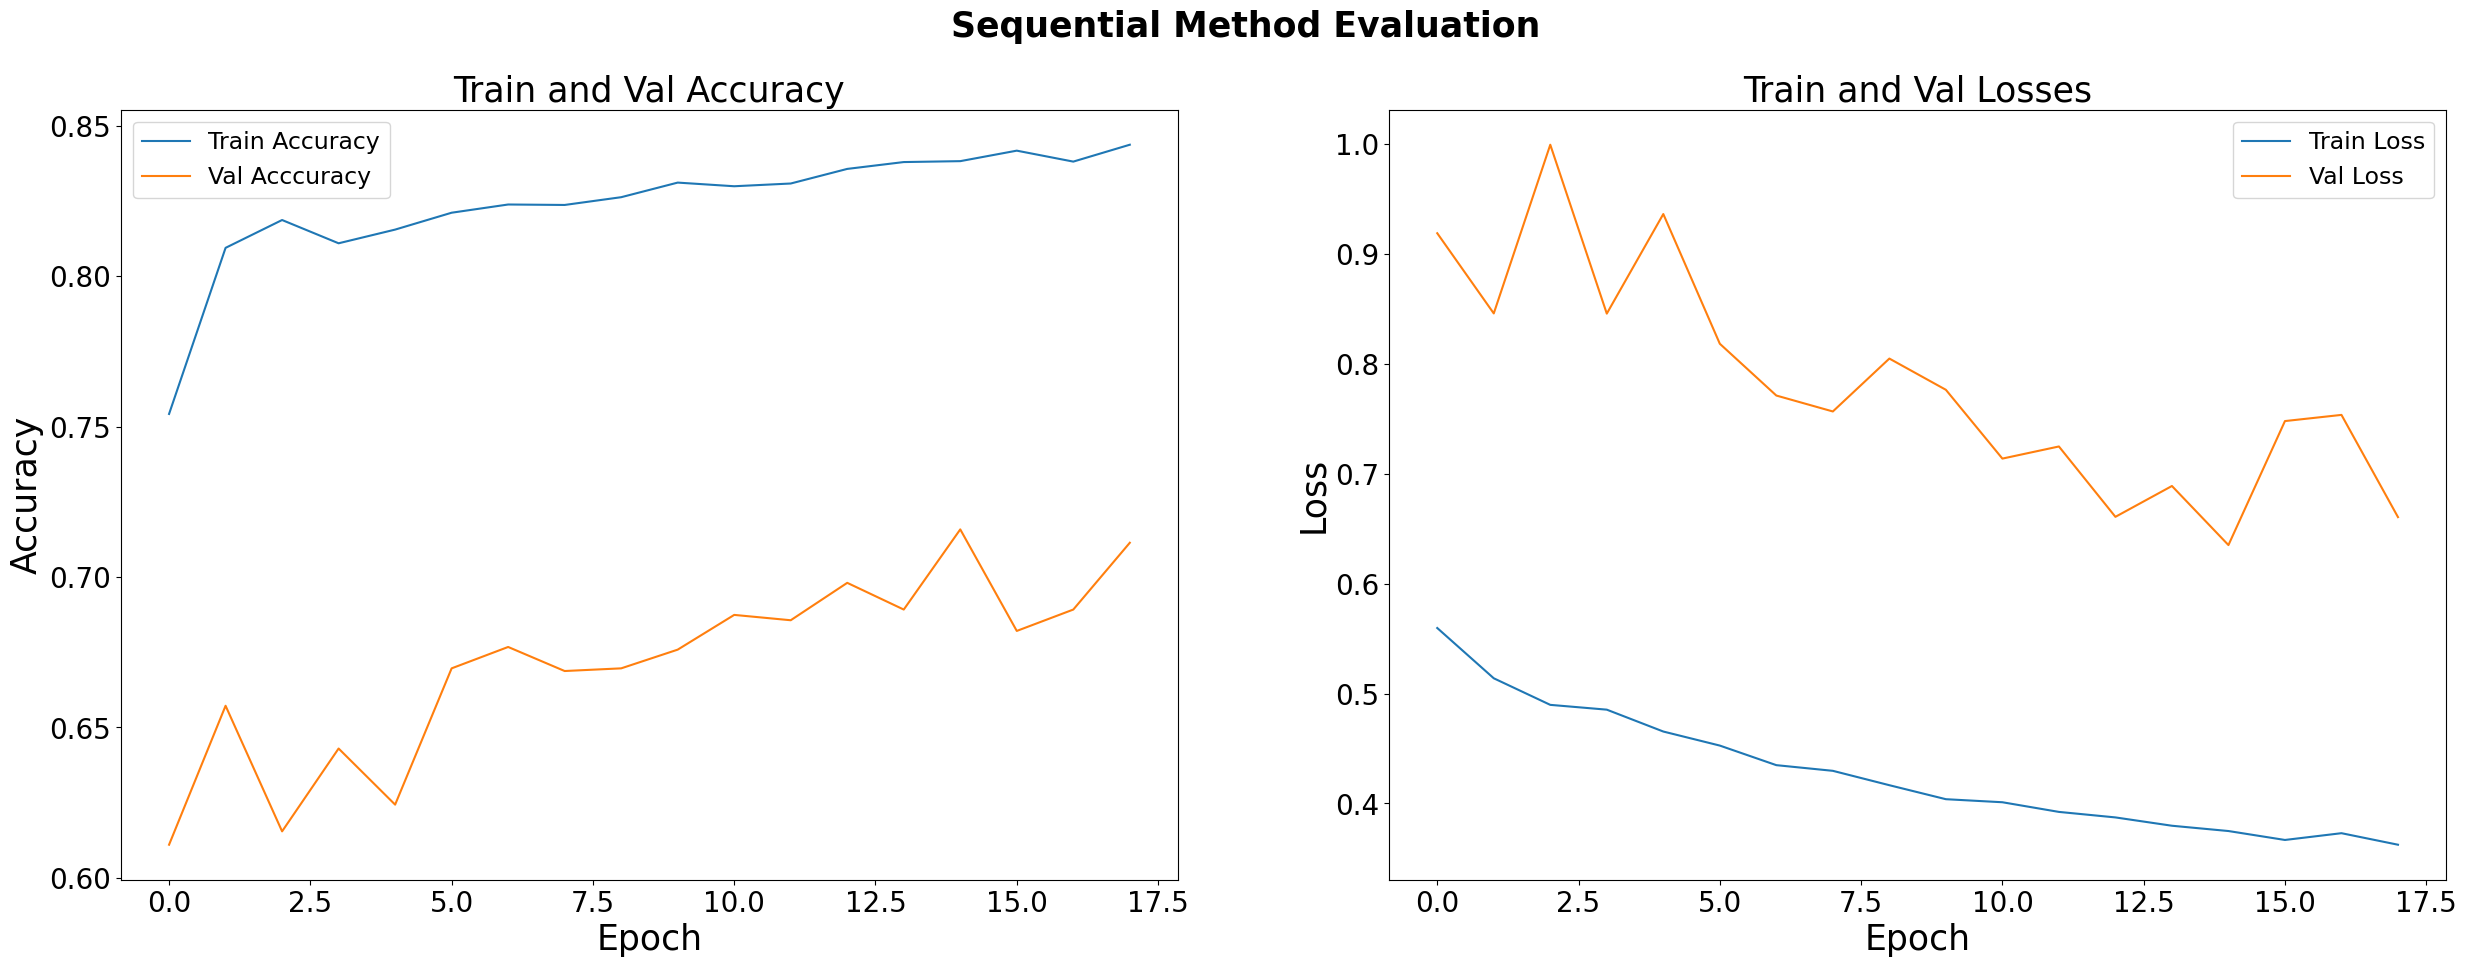

In [147]:
# Create plot Sequential Evaluation

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Train and Val Accuracy", fontsize=25)
plt.plot(history_seq.history['accuracy'],label="Train Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Val Acccuracy")
plt.ylabel("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Val Losses", fontsize=25)
plt.plot(history_seq.history['loss'], label="Train Loss")
plt.plot(history_seq.history['val_loss'], label="Val Loss")
plt.ylabel("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.style.use('default')
plt.show()

In sequential model , accuracy and loss are only good on data train. While the validation data is very bad and tends to explode gradient.

### Functional Evaluation

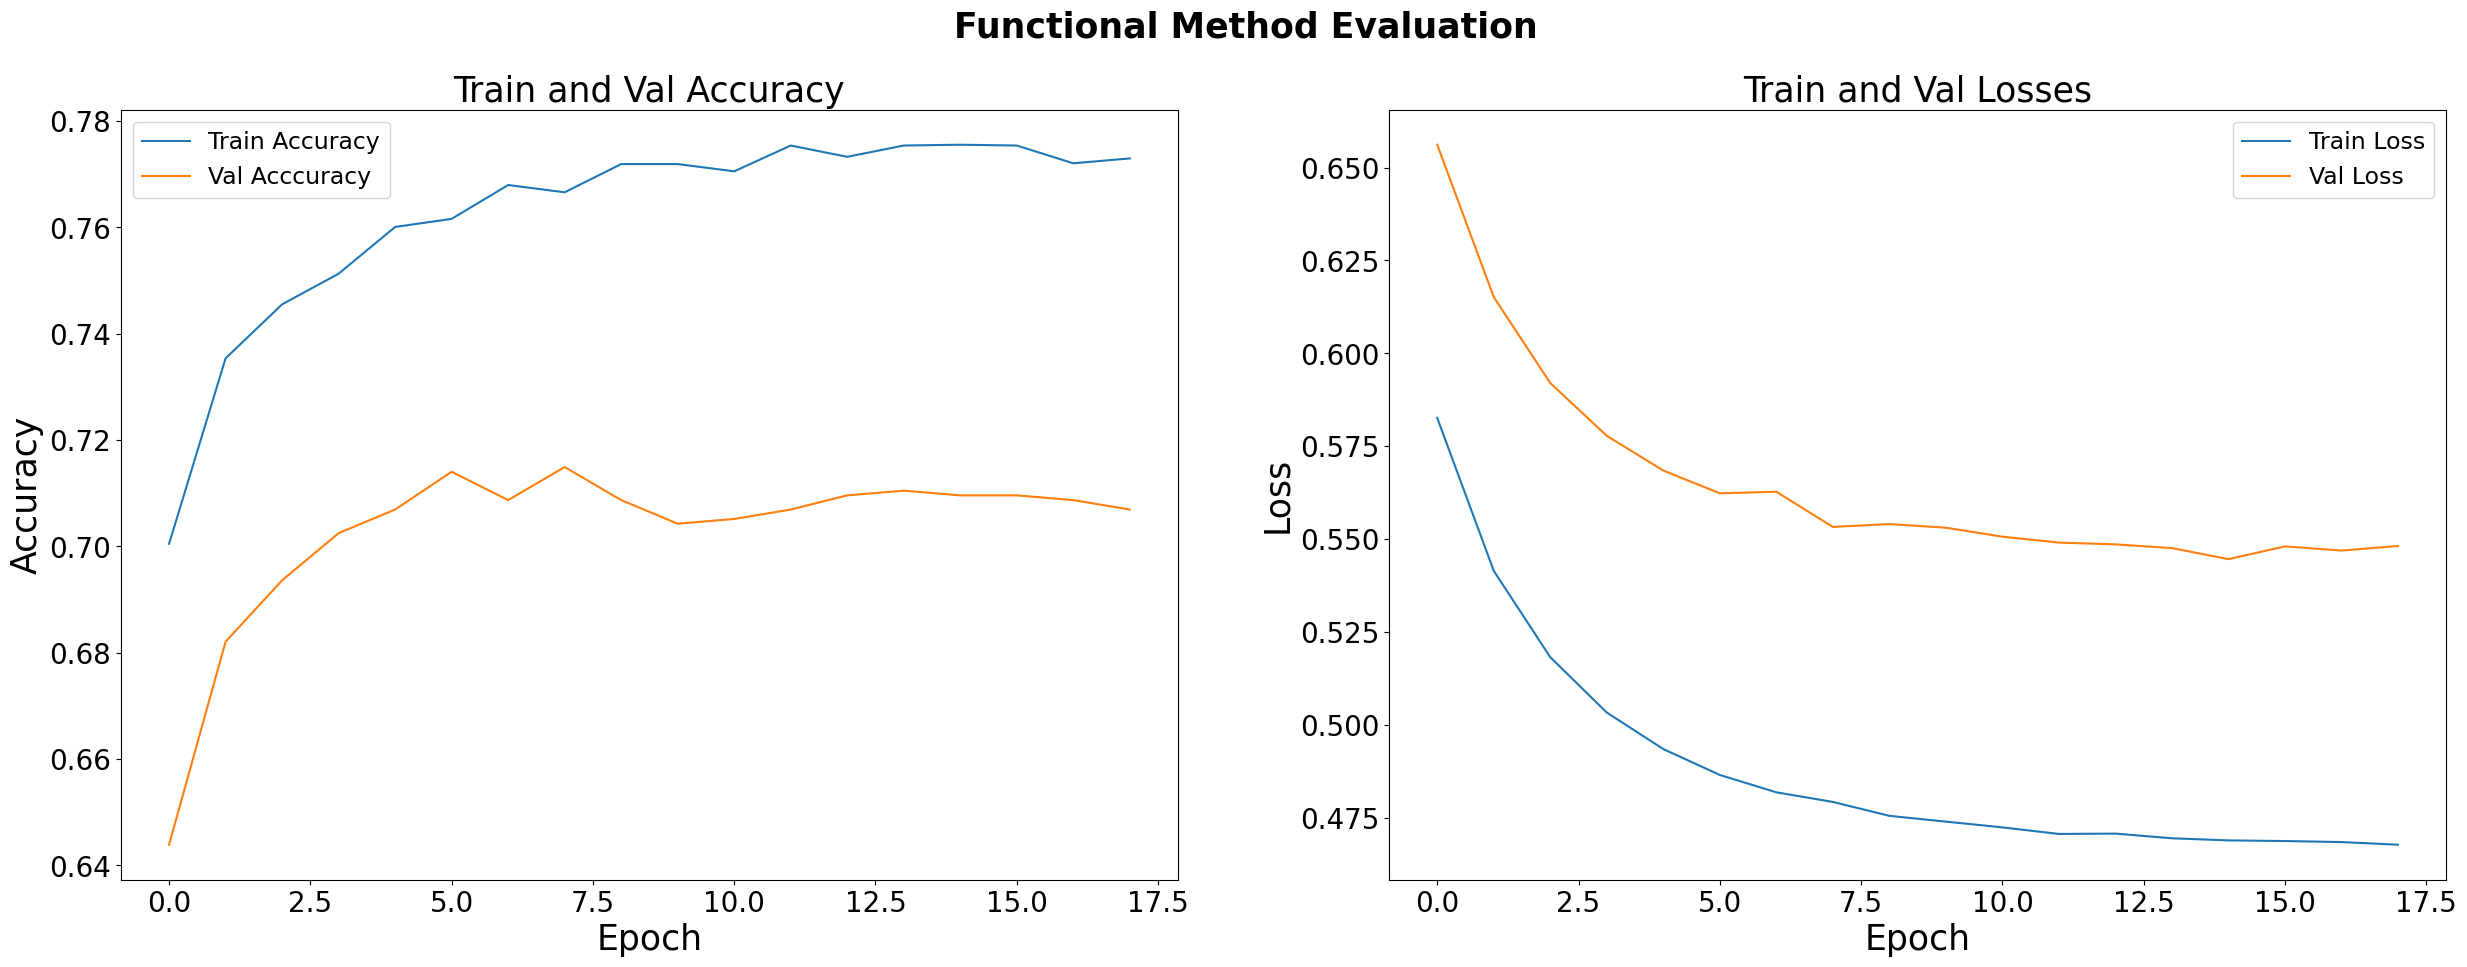

In [148]:
# Create plot Functional Evaluation

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Train and Val Accuracy", fontsize=25)
plt.plot(history_func.history['accuracy'],label="Train Accuracy")
plt.plot(history_func.history['val_accuracy'], label="Val Acccuracy")
plt.ylabel("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Val Losses", fontsize=25)
plt.plot(history_func.history['loss'], label="Train Loss")
plt.plot(history_func.history['val_loss'], label="Val Loss")
plt.ylabel("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.style.use('default')
plt.show()

on the functional model, data train and validation are good but still tend to overfit.

### Sequential Improvement Evaluation

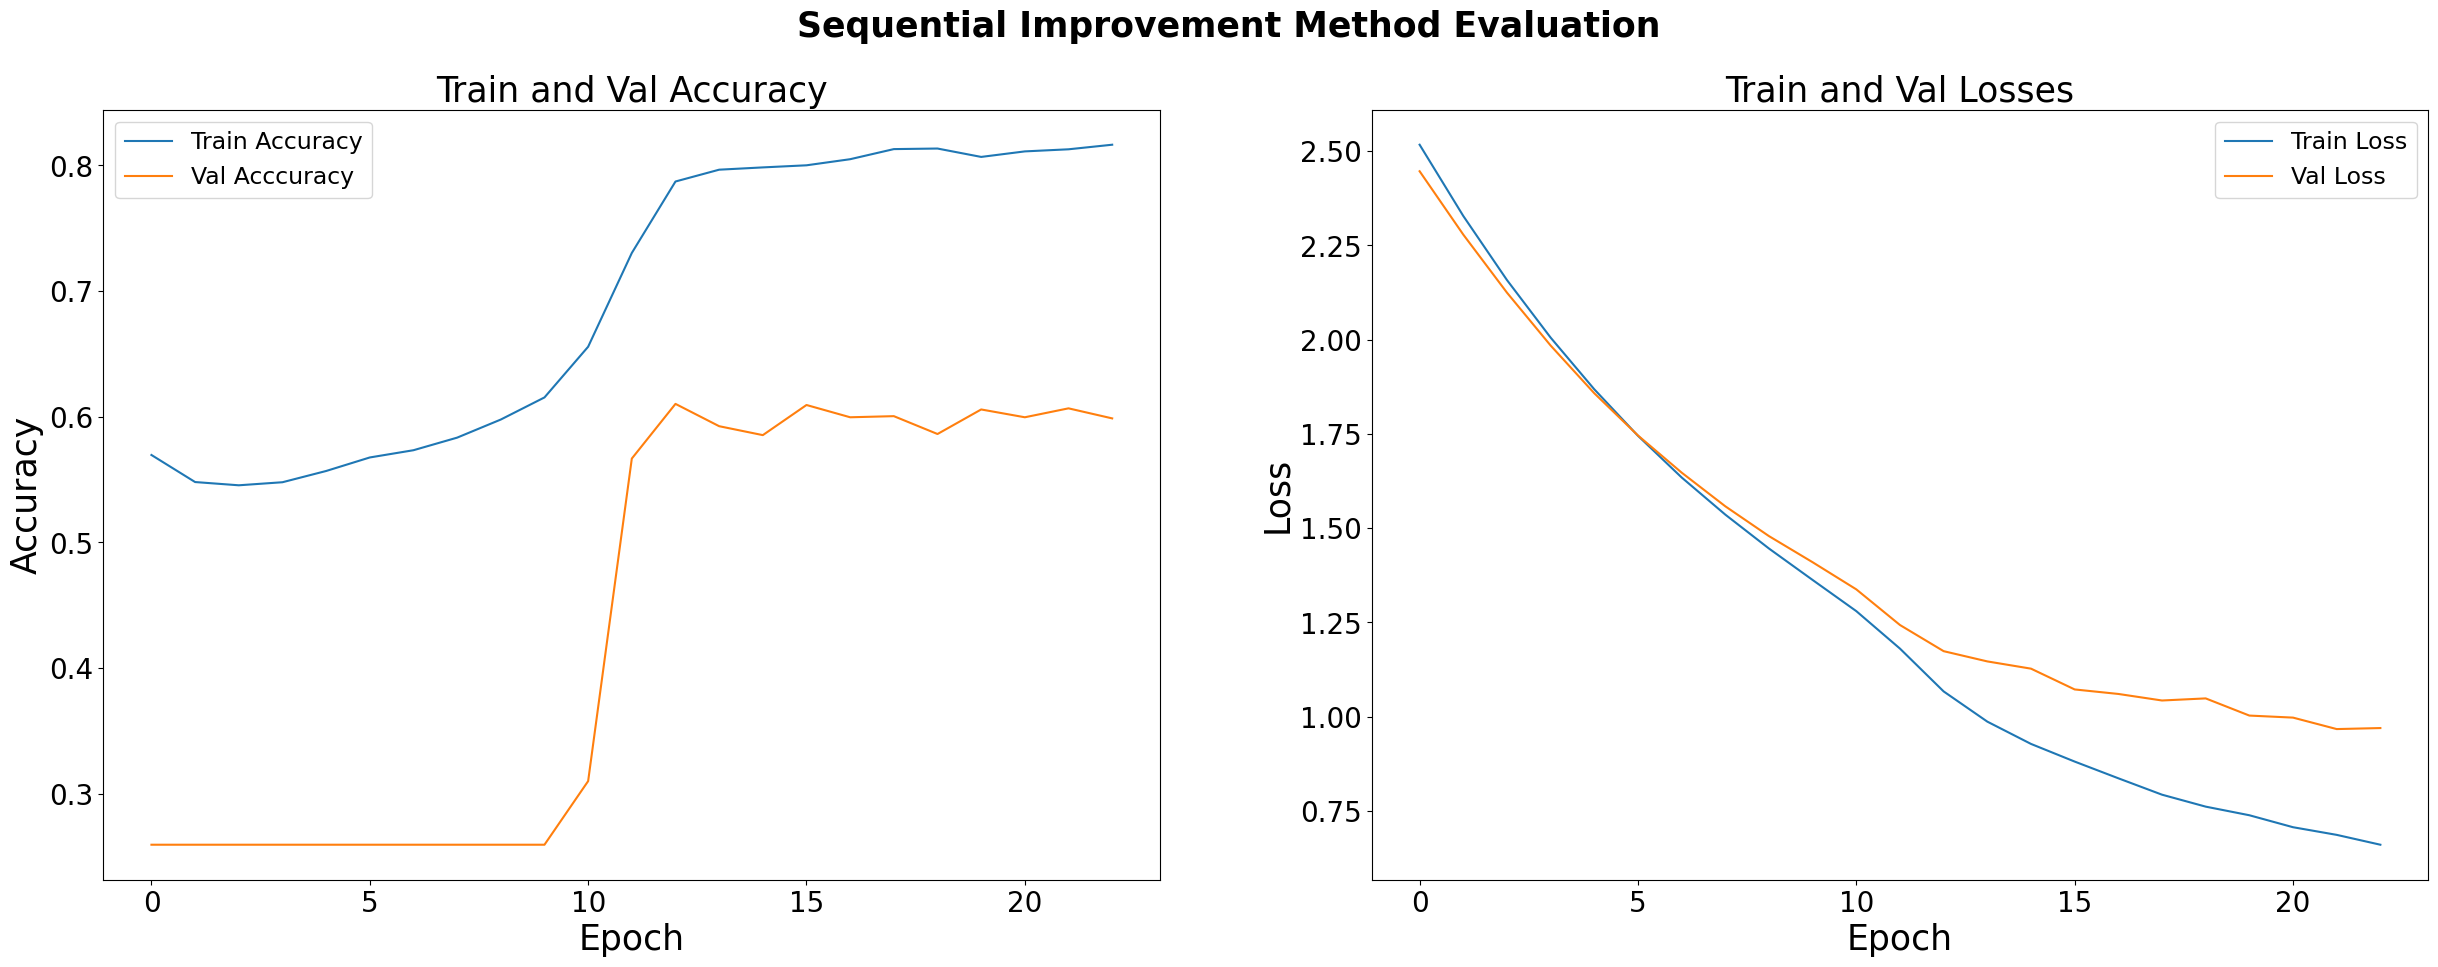

In [449]:
# Create plot Sequential Improvement Evaluation

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Improvement Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Train and Val Accuracy", fontsize=25)
plt.plot(history_seq_i.history['accuracy'],label="Train Accuracy")
plt.plot(history_seq_i.history['val_accuracy'], label="Val Acccuracy")
plt.ylabel("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Val Losses", fontsize=25)
plt.plot(history_seq_i.history['loss'], label="Train Loss")
plt.plot(history_seq_i.history['val_loss'], label="Val Loss")
plt.ylabel("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.style.use('default')
plt.show()

In the improved sequential model, it looks better accuracy and loss. Where the loss of the two data both decreased and began to separate around epoch 12. While for accuracy there was a meeting around epoch 12. However, it still tends to overfit.

### Functional Improvement Evaluation

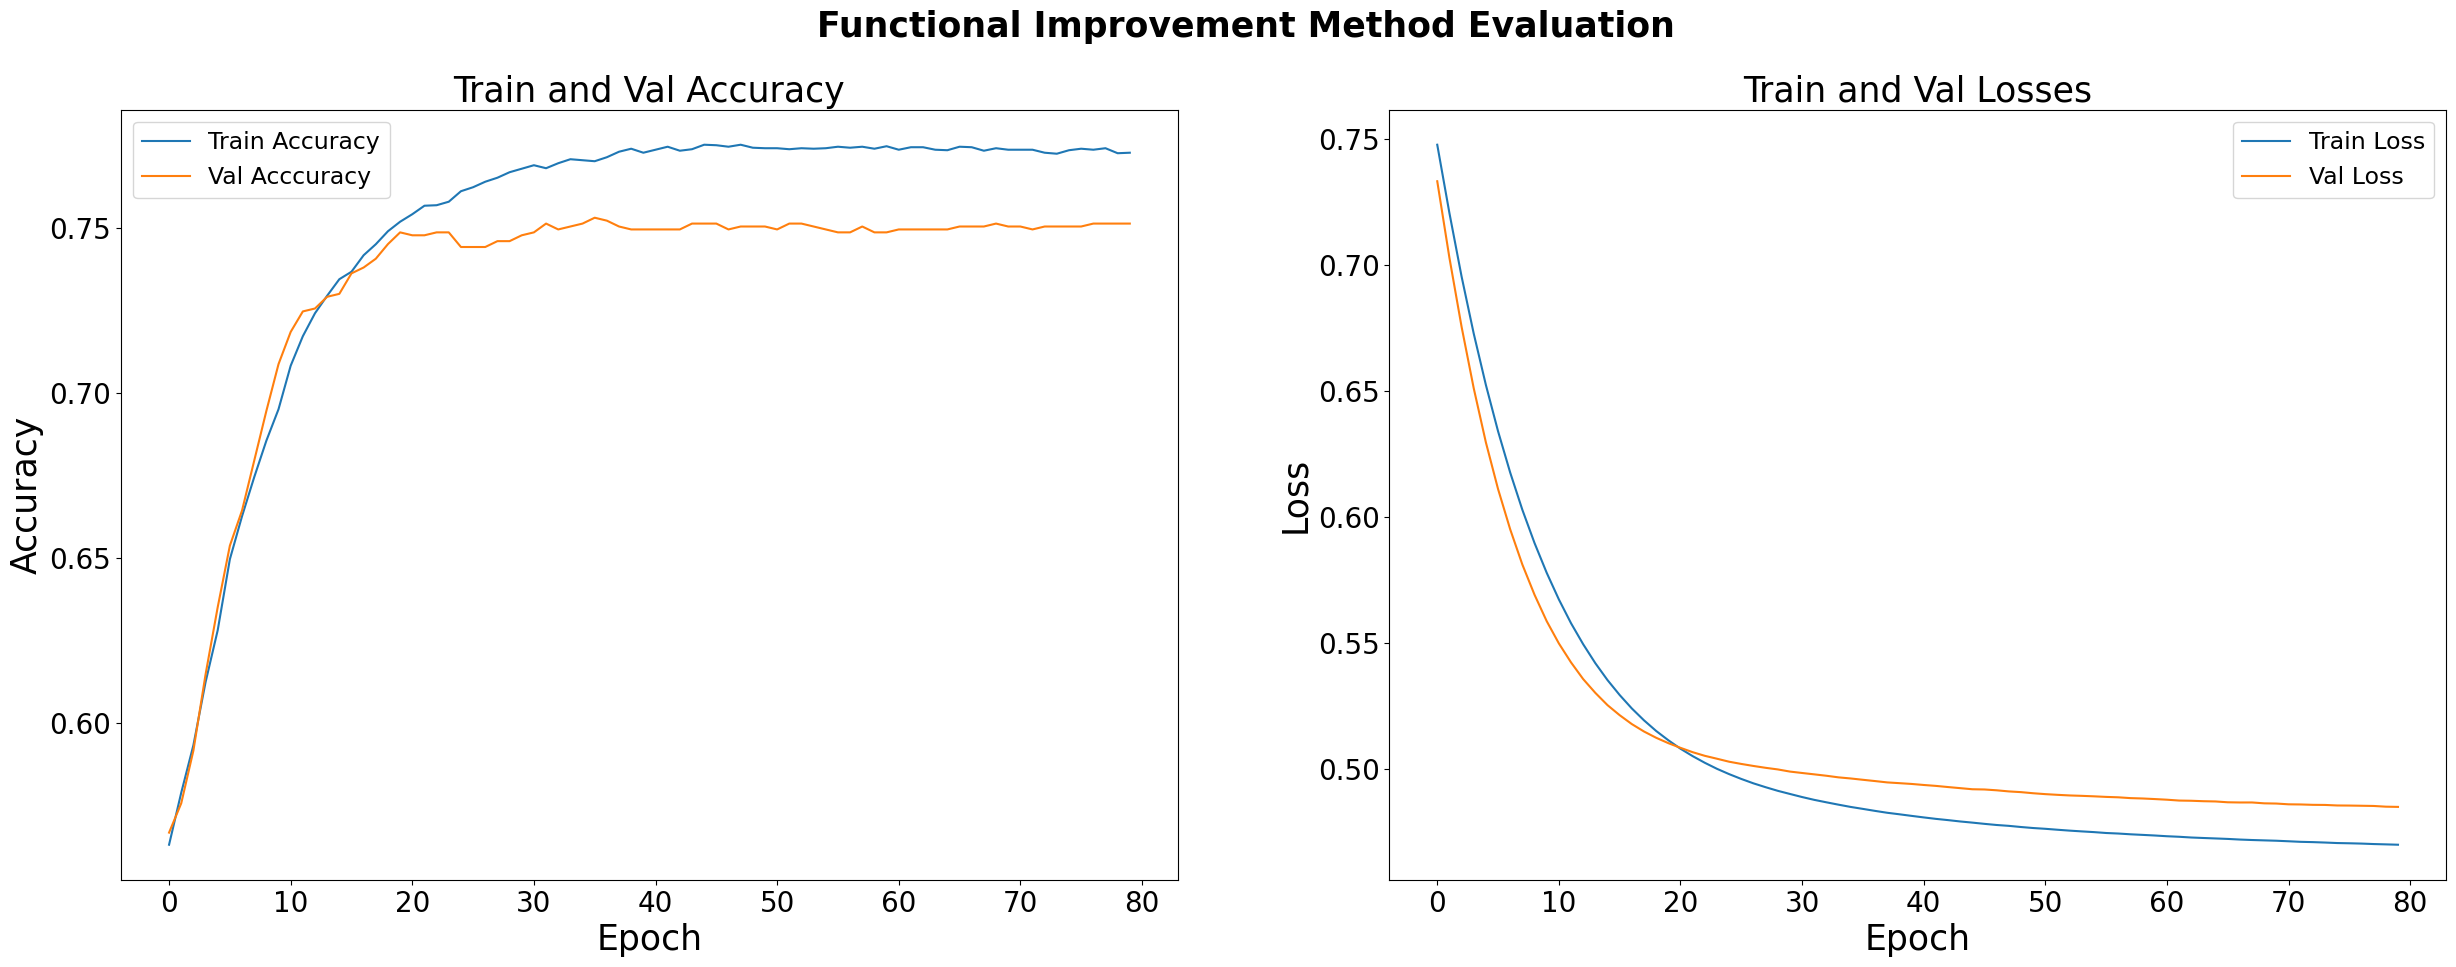

In [446]:
# Create plot Functional Improvement Evaluation

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Improvement Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Train and Val Accuracy", fontsize=25)
plt.plot(history_func_i.history['accuracy'],label="Train Accuracy")
plt.plot(history_func_i.history['val_accuracy'], label="Val Acccuracy")
plt.ylabel("Accuracy", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Val Losses", fontsize=25)
plt.plot(history_func_i.history['loss'], label="Train Loss")
plt.plot(history_func_i.history['val_loss'], label="Val Loss")
plt.ylabel("Loss", fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.legend()

plt.style.use('default')
plt.show()

On the Functional model that has been upgraded looks very good. Where accuracy increases both val and train data and starts to separate slightly at epoch 20. At the loss score, both data experience a decrease in rhythm.

# 9 - Model Saving

In [452]:
# Save The Best Model

pickle.dump(preprocess, open('preprocess_model.pkl', 'wb'))
ml_func_i.save('customer_churn_model.h5')

- We save our mode as h5 extention with the name customer_churn_model.h5.
- Model we will use is Functional with improvement model.

# 10 - Model Inference

In [481]:
# Transform encode and scaling
inf_pipe = preprocess.transform(df_inf) 

# Model Definition
prediction = ml_func_i.predict(inf_pipe)

# Array to decimal
prediction = np.round_(prediction)

# Create prediction to new column
predict_tar = pd.DataFrame(prediction, columns=['Prediction Churn'])

# Concat between data inference with predix
Pred_inf = pd.concat([df_inf, predict_tar], axis=1)
Pred_inf

1/1 [==============================] - 0s 21ms/step


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,Prediction Churn
0,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25,No,1.0
1,Male,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,25.60,901.25,No,0.0
2,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.00,5999.85,No,0.0
3,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,No,0.0
4,Male,0,Yes,No,22,Yes,Yes,Fiber optic,Yes,No,No,Yes,Yes,No,Month-to-month,No,Credit card (automatic),95.90,2234.95,No,1.0


The model runs well on the inference data, and manages to predict 3 correctly.

# 11 - Conclusions

From the overall analysis that we have done, we know that the target data that we have is not balanced so we have to do something called resampling to make model learning better. Users with tenures from 65 to 72 are the most users in our data-set. and customers who pay monthly are more indicated to churn. The data we have on average are normally distributed. After running the data on the sequential and functional models, it was found that the functional model has better performance, although it still tends to overfit. After improving the performance of both models, it was found that the improved functional model showed better performance than the sequential model. After testing the data inference model, it went well and succeeded in predicting the inference data.